In [9]:
! pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      Traceback (most recent call last):
        File "C:\Users\abdal\anaconda3\Lib\site-packages\packaging\requirements.py", line 36, in __init__
          parsed = _parse_requirement(requirement_string)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\abdal\anaconda3\Lib\site-packages\packaging\_parser.py", line 62, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\abdal\anaconda3\Lib\site-packages\packaging\_parser.py", line 80, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\abdal\anaconda3\Lib\site-packages\packaging\_parser.py"

In [11]:
! pip install tensorflow 

^C


  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.8/390.3 MB 6.7 MB/s eta 0:00:58
   ---------------------------------------- 4.7/390.3 MB 15.9 MB/s eta 0:00:25

In [12]:
! pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.1.0
aext-assistant                    4.1.0
aext-assistant-server             4.1.0
aext-core                         4.1.0
aext-core-server                  4.1.0
aext-panels                       4.1.0
aext-panels-server                4.1.0
aext-project-filebrowser-server   4.1.0
aext-share-notebook               4.1.0
aext-share-notebook-server        4.1.0
aext-shared                       4.1.0
aext-toolbox                      4.1.0
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
alembic                           1.13.3
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-cli-base    

In [18]:
import tensorflow as tf 
import os

In [19]:
gpus=tf.config.experimental.list_physical_devices('CPU')
print(gpus) 

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [20]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## Remove Dodgy images

In [46]:
import cv2
import imghdr

C:\Users\abdal\AppData\Local\Temp\ipykernel_17468\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [49]:
os.listdir(data_dir)

['happy', 'sad']

In [48]:
data_dir = 'data'
image_exts=['jpg', 'jpeg', 'png','bmp' ]
image_exts[1]

'jpeg'

In [50]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except:
            print("Issue with image {}".format(image_path))
            # os.remove(image_path)        

Image not in ext list data\happy\427394C200000578-0-image-a-24_1500384481554.jpg
Image not in ext list data\happy\getty_152414899_97046097045006_68075.jpg
Image not in ext list data\happy\getty_478389113_970647970450091_99776.jpg
Image not in ext list data\happy\vector.svg
Image not in ext list data\happy\vector10.svg
Image not in ext list data\happy\vector11.svg
Image not in ext list data\happy\vector2.svg
Image not in ext list data\happy\vector3.svg
Image not in ext list data\happy\vector4.svg
Image not in ext list data\happy\vector5.svg
Image not in ext list data\happy\vector6.svg
Image not in ext list data\happy\vector7.svg
Image not in ext list data\happy\vector8.svg
Image not in ext list data\happy\vector9.svg
Image not in ext list data\sad\clip-art-seas-internet-scams-and-frauds-best-home-business-is-1713890451800.webp
Image not in ext list data\sad\depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg


In [51]:
img=cv2.imread(os.path.join('data','happy',"smile.woman_.jpg"))


In [52]:
img.shape

(3844, 5125, 3)

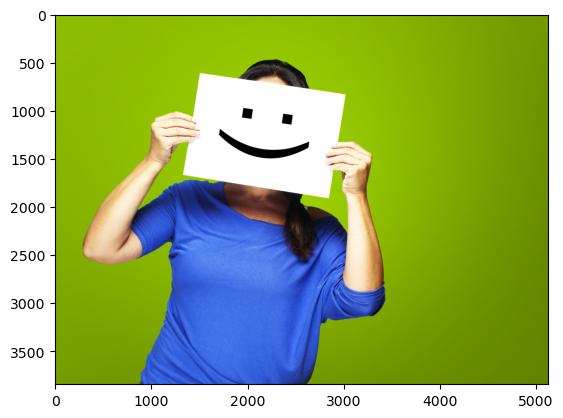

In [56]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

## Loading the Data

In [73]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [57]:
import numpy as np
from matplotlib import pyplot as plt


In [74]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [135]:
## Load the data using Open directory ## and resize the image
## Building data pipeline
data=tf.keras.utils.image_dataset_from_directory('data')

Found 199 files belonging to 2 classes.


In [136]:
type(data)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [137]:
data_iterator=data.as_numpy_iterator()
## allowing us access to the pipeline

In [138]:
# Get another batch form the iterator
batch=data_iterator.next()
## Access to the pipeline

In [139]:
# Images represented as numpy arrays    
batch[0].shape

(32, 256, 256, 3)

In [140]:
batch[1]
# The labels

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1])

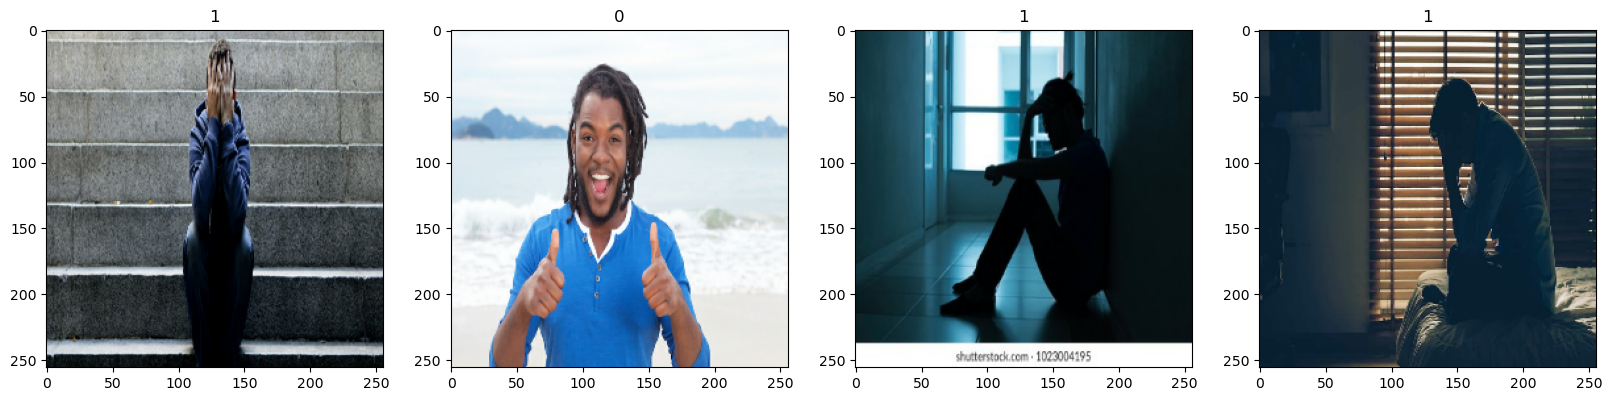

In [141]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    
# 1---> sad
# 0---> happy    

## Preprocessing the Data

In [142]:
data=data.map(lambda x,y:(x/255,y))

In [143]:
data.as_numpy_iterator().next()[0].max()

1.0

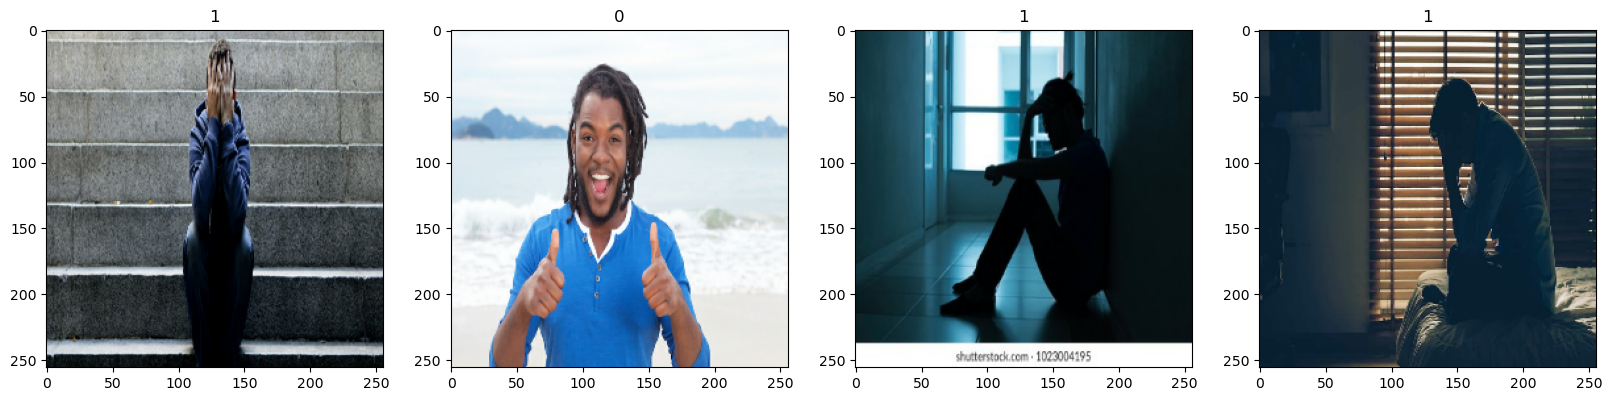

In [145]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    
# 1---> sad
# 0---> happy    

## Split the data

In [152]:
len(data)

7

In [150]:
train_size=int(len(data)*0.7)
val_size=int(len(data)*0.2)+1
test_size=int(len(data)*0.1)+1


In [155]:
test_size+train_size+val_size

7

In [156]:
# to make partitions to your data
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

## Building the CNN modle

In [167]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout 

In [172]:

model=Sequential([
    Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(16,(3,3),1,activation='relu'),
    MaxPooling2D((2,2)),
    
    
    Conv2D(16,(3,3),1,activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(256,activation='relu'),
    Dense(1,activation='sigmoid')
    

])

c:\Users\abdal\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [173]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [175]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,692,001 (14.08 MB)

 Trainable params: 3,692,001 (14.08 MB)

 Non-trainable params: 0 (0.00 B)

### Train the Model

In [176]:
logdir='logs'

In [177]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [178]:
hist=model.fit(train,validation_data=val,epochs=20,callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 432ms/step - accuracy: 0.4865 - loss: 0.7644 - val_accuracy: 0.4531 - val_loss: 0.7149
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 367ms/step - accuracy: 0.5896 - loss: 0.6587 - val_accuracy: 0.6094 - val_loss: 0.6170
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 378ms/step - accuracy: 0.6812 - loss: 0.5140 - val_accuracy: 0.6250 - val_loss: 0.5137
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 417ms/step - accuracy: 0.7729 - loss: 0.4557 - val_accuracy: 0.8594 - val_loss: 0.4512
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 385ms/step - accuracy: 0.8490 - loss: 0.4536 - val_accuracy: 0.9062 - val_loss: 0.3135
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 328ms/step - accuracy: 0.9073 - loss: 0.3133 - val_accuracy: 0.8750 - val_loss: 0.3013
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 346ms/step - accuracy: 0.9135 - loss: 0.2247 - val_accuracy: 0.9688 - val_loss: 0.1498
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 377ms/step - accuracy: 0.9552 - loss: 0.1966 - val_accuracy: 0.9688 - val_loss:

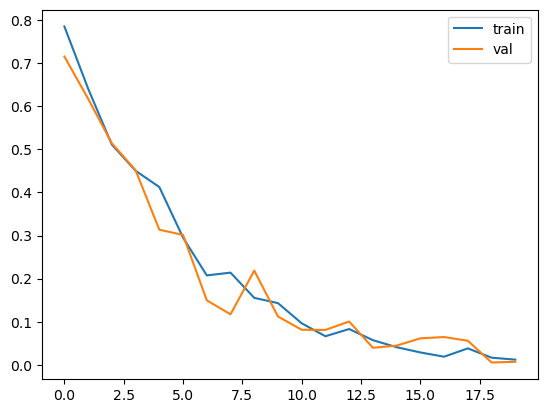

In [180]:
# Plot for the training and validation loss
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='val')
plt.legend()

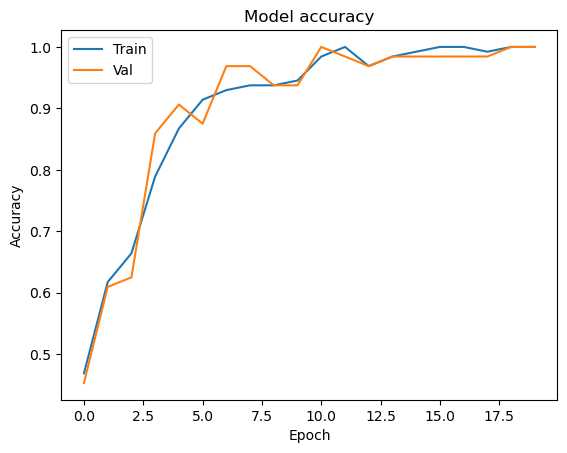

In [179]:
# Plot the performance of the model
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


### Evaluate the Model

In [ ]:
test.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [188]:
model.evaluate(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 1.0000 - loss: 0.0017


[0.0016888600075617433, 1.0]

In [207]:
X=model.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


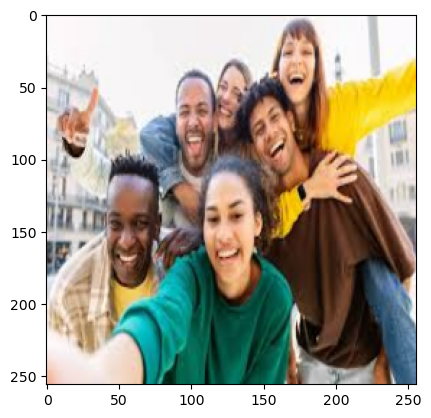

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[2.8583167e-07]]
happy


In [308]:
import random

# Get a batch from the test dataset
test_batch = test.as_numpy_iterator().next()
images, labels = test_batch

# Select a random index
idx2 = random.randint(0, len(images) - 1)

# Display the image
plt.imshow(images[idx2])
plt.show()

# Predict the label
y_pred = model.predict(images[idx2].reshape(1, 256, 256, 3))
print(y_pred)
y_pred = y_pred > 0.5

if y_pred == 0:
    print('happy')
else:
    print('sad')


In [309]:
from tensorflow.keras.metrics import Accuracy,Precision,Recall

In [303]:
# Initialize the metrics
pre = Precision()
acc = Accuracy()
rec = Recall()

for batch in test.as_numpy_iterator():
    images, labels = batch
    y_pred = model.predict(images)
    pre.update_state(labels, y_pred)
    acc.update_state(labels, y_pred)
    rec.update_state(labels, y_pred)

print(f'Precision: {pre.result().numpy()}')
print(f'Accuracy: {acc.result().numpy()}')
print(f'Recall: {rec.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Precision: 1.0
Accuracy: 0.0
Recall: 1.0


## Save the model

In [313]:
from tensorflow.keras.models import load_model

In [311]:
model.save(os.path.join('models','happysadmodel.h5'))

In [314]:
new_model=load_model(os.path.join('models','happysadmodel.h5'))

In [316]:
new_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,692,003 (14.08 MB)

 Trainable params: 3,692,001 (14.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)